# Projeto 2 - Ciência dos Dados

Nome: Carlos Andrade Inacio

Nome: Carlos Felipe Borges Mesquita

___
Carregando algumas bibliotecas:

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor() 

pd.options.mode.chained_assignment = None

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Carlos\Documents\insper\cdados\Projeto 2\cdados_projeto2


Carregando a base de dados

In [3]:
filename = 'AllResults1.csv'

In [4]:
train = pd.read_csv(filename)
train

,PPID,PP,EAL,SEN,HML,Re,Wr,Ma,Att8Est,Att8Act,Att8Diff,EngEst,EngAct,EngDiff,MathsEst,MathsAct,MathsDiff,EbaccEst,EbaccAct,EbaccDiff
0,617,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,1.5,NaN,NaN,2.0,NaN,NaN,0.0,NaN
1,283,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,3.0,NaN,NaN,5.5,NaN,NaN,3.7,NaN
2,75,0.0,0,0.0,M,NaN,NaN,3,2.9,4.1,1.17,3.5,4.0,0.54,2.9,4.0,1.13,1.9,1.3,-0.57
3,1019,1.0,0,0.0,L,NaN,NaN,3,2.2,3.5,1.26,2.8,4.0,1.18,2.0,3.0,0.98,1.2,2.0,0.84
4,474,0.0,0,0.0,L,3C,3B,N,1.7,2.9,1.21,2.2,3.0,0.76,1.3,3.0,1.65,0.7,2.0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,174,1.0,0,0.0,M,4B,4,4B,3.9,5.0,1.08,4.3,6.0,1.67,3.6,4.0,0.36,3.5,4.3,0.82
1033,812,1.0,0,0.0,M,5B,3,4C,4.3,3.1,-1.18,4.7,3.0,-1.71,4.1,3.0,-1.08,4.0,3.0,-0.97
1034,425,1.0,0,1.0,H,5B,4,5C,5.5,5.2,-0.30,5.8,6.0,0.20,5.4,4.0,-1.44,5.4,5.3,-0.05
1035,376,1.0,0,0.0,M,5C,4,4B,4.7,1.7,-3.03,5.1,4.0,-1.13,4.6,3.0,-1.58,4.5,1.0,-3.49


In [5]:
train = train.drop(columns=['PPID','Att8Est','Att8Act','Att8Diff','EngEst','EngAct','EngDiff','MathsEst','MathsAct','MathsDiff','EbaccEst','EbaccAct','EbaccDiff'])
train

,PP,EAL,SEN,HML,Re,Wr,Ma
0,1.0,0,0.0,NaN,NaN,NaN,NaN
1,1.0,1,0.0,NaN,NaN,NaN,NaN
2,0.0,0,0.0,M,NaN,NaN,3
3,1.0,0,0.0,L,NaN,NaN,3
4,0.0,0,0.0,L,3C,3B,N
...,...,...,...,...,...,...,...
1032,1.0,0,0.0,M,4B,4,4B
1033,1.0,0,0.0,M,5B,3,4C
1034,1.0,0,1.0,H,5B,4,5C
1035,1.0,0,0.0,M,5C,4,4B


In [6]:
# PP = Pupil Premium - The pupil premium is additional funding for publicly funded schools in England.
# EAL = English as an additional language
# SEN = Special Education Needs (True or False)
# HML = Ability based on previous Data (Higher, Middle, Lower)
# Re = Reading Grade from age 10
# Wr = Writing Grade from age 10
# Ma = Maths Grade from age 10

In [7]:
# numerificação das notas 
# https://www.northoxfordshire-academy.org/Portals/0/Letters%20Sent%20Home/Target%20Setting%20Year%2011%20Explained%202016%2017.pdf?ver=2016-10-31-144606-610
grades = {'N' : '0', 'B' : '5', '3C' : '4', '3B' : '4', '3A' : '4', '4C' : '5', '4B' : '5', '4A' : '6', '5C' : '7', '5B' : '8', '5A' : '8', '6C' : '8', '6B' : '9', '6A' : '10'}

df = train

def update_grades(column, dataframe):
    for k, v in enumerate(dataframe[column]):
        if v in grades.keys():
            dataframe[column][k] = grades[v]

def update_average(dataframe, index):
    count = 0
    average = 0
    Re = -1 if pd.isna(dataframe['Re'][index]) else int(dataframe['Re'][index])
    Wr = -1 if pd.isna(dataframe['Wr'][index]) else int(dataframe['Wr'][index])
    Ma = -1 if pd.isna(dataframe['Ma'][index]) else int(dataframe['Ma'][index])

    if Re >= 0:
        count += 1
        average += Re
    if Wr >= 0:
        count += 1
        average += Wr
    if Ma >= 0:
        count += 1
        average += Ma

    if count > 0:
        average /= count
    
    return average
            
update_grades('Re', df)
update_grades('Wr', df)
update_grades('Ma', df)


def cleanup_nans(dataframe, columns):
    # não é razoável assumir o nível do aluno (então removeremos essa linha caso o HML seja NaN)
    dataframe.dropna(subset=('HML',), inplace=True)
    
    # para todas as outras colunas é razoável assumir os valores de NaN como 0
    # embora não transformaremos os NaNs nas notas, somente as ignoraremos e faremos a média com os valores existentes
    dataframe.fillna(0, inplace=True)

#transformando os valores da coluna HML
# H(Higher) = 2 -- M(Middle) = 1 -- L(Lower) = 0
hml = {'L' : 0, 'M' : 1, 'H' : 2}
for k, v in enumerate(df['HML']):
    if v in hml.keys():
        df['HML'][k] = hml[v]

# criar coluna de média
average = []
for i in range(len(df['Re'])):
    average.append(update_average(df, i))

df['AVG'] = average

cleanup_nans(df, ['PP', 'EAL', 'SEN'])

Primeiramente, nós transformamos as notas de Leitura, Escrita e Matemática em valores numéricos através de um dicionário e algumas referências onlines (ainda tivemos que estimar alguns valores)

Então, criamos uma coluna de média com base nas médias das notas válidas (se o valor de alguma nota fosse NaN, ela era descartada do cálculo da média)

Nós também tiramos todas as colunas em que o nível do aluno era NaN, pois não é seguro assumir que o nível do aluno era baixo se este não foi informado.

Para os valores de PP, EAL e SEN, nós substituimos os NaNs por 0. Essa transformação faz sentido pois estes valores é seguro dizer que, caso estes valores não tenham sido informados, eles não eram maiores do 0 (por exemplo, se o SEN do aluno não for informado, podemos assumir que ele não é um aluno de necessidades especiais).

In [8]:
# correlação média com PP
pp_avg = df.loc[:,["PP", "AVG"]]
corr = pp_avg.corr()

print('A correlação entre o PP e a média das notas é negativa, o que indica que se o aluno pagar o financiamento adicional, a média de notas dele é menor.')
corr

A correlação entre o PP e a média das notas é negativa, o que indica que se o aluno pagar o financiamento adicional, a média de notas dele é menor.


,PP,AVG
PP,1.000000,-0.146918
AVG,-0.146918,1.000000


In [9]:
# correlação média com EAL
eal_avg = df.loc[:,["EAL", "AVG"]]
corr = eal_avg.corr()

print('A correlação entre o EAL e a média das notas é negativa, o que indica que se o inglês não for a linguagem nativa do estudante, suas notas são mais baixas.')
corr

A correlação entre o EAL e a média das notas é negativa, o que indica que se o inglês não for a linguagem nativa do estudante, suas notas são mais baixas.


,EAL,AVG
EAL,1.000000,-0.062834
AVG,-0.062834,1.000000


In [10]:
# correlação média com SEN
sen_avg = df.loc[:,["SEN", "AVG"]]
corr = sen_avg.corr()

print('A correlação entre o SEN e a média das notas é negativa, o que indica que se o aluno tiver necessidades especiais, suas notas não menores.')
corr

A correlação entre o SEN e a média das notas é negativa, o que indica que se o aluno tiver necessidades especiais, suas notas não menores.


,SEN,AVG
SEN,1.000000,-0.218486
AVG,-0.218486,1.000000


In [11]:
df_treino = train_test_split(df, shuffle=False)[0]
df_teste = train_test_split(df, shuffle=False)[1]

,PP,EAL,SEN,HML,Re,Wr,Ma,AVG
2,0.0,0,0.0,1,0,0,3,3.000000
3,1.0,0,0.0,0,0,0,3,3.000000
4,0.0,0,0.0,0,4,4,0,2.666667
5,0.0,0,0.0,2,8,7,7,7.333333
8,0.0,0,0.0,1,5,4,8,5.666667
...,...,...,...,...,...,...,...,...
1032,1.0,0,0.0,1,5,4,5,4.666667
1033,1.0,0,0.0,1,8,3,5,5.333333
1034,1.0,0,1.0,2,8,4,7,6.333333
1035,1.0,0,0.0,1,7,4,5,5.333333


Separamos o nosso dataframe filtrado e manipulado em 2: um dataset de teste e outro de treinamento (o de treinamento sendo claramente maior)

In [12]:
# Regressao linear
import statsmodels.formula.api as smf
reg = smf.ols(formula='AVG~HML+PP', data=df_treino).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AVG   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     487.4
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.37e-135
Time:                        15:25:06   Log-Likelihood:                -877.13
No. Observations:                 740   AIC:                             1760.
Df Residuals:                     737   BIC:                             1774.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8255      0.062     61.720      0.000       3.704       3.947
HML            1.3797      0.045     30.500      0.000       1.291       1.468
PP            -0.1204      0.063     -1.914      0.056      -0.244       0.003
==============================================================================
Omnibus:                      135.090   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.943
Skew:                          -1.016   Prob(JB):                     2.20e-62
Kurtosis:                       5.253   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para o modelo de regressão linear, removemos os valores de EAL e SEN pois o valor de P destas variáveis era maior que 10%.
Através do modelo podemos assumir que o nível do aluno com base nas notas anteriores é um fator forte na média do aluno. Também é possível assumir que o PP (Pupil Premium: se o aluno fez doação para a escola) demonstra ser um fator negativo à média do aluno.

In [13]:
predicao = reg.predict(df_teste)

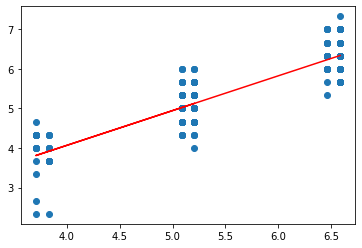

In [14]:
plt.scatter(predicao, df_teste['AVG'])

z = np.polyfit(predicao, df_teste['AVG'], 1)
p = np.poly1d(z)
plt.plot(predicao,p(predicao),"r")

Como podemos ver, a linha de tendência do gráfico de dispersão indica que os valores da predição e os valores verdadeiros são bem aproximados. 

In [15]:
mean_squared_error(df_teste['AVG'], predicao)

0.2425148294154462

O 'mean squared error' é aproximadamente 0.24, ou seja, os valores da previsão estão bem aproximados da linha de tendência, sugerindo que o modelo é válido.

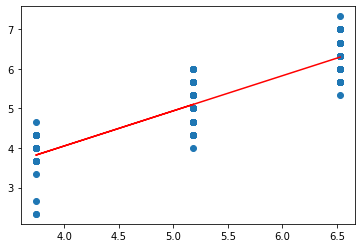

In [32]:
# Random forest regression

random_forest.fit(df_treino['HML'].values.reshape(-1, 1), df_treino['AVG'])
y_pred = random_forest.predict(df_teste['HML'].values.reshape(-1, 1))

plt.scatter(y_pred, df_teste['AVG'])

z = np.polyfit(y_pred, df_teste['AVG'], 1)
p = np.poly1d(z)
plt.plot(y_pred,p(y_pred),"r")

A linha de tendência do gráfico de dispersão é semelhante aquela do do modelo de regressão linear, ou seja, também indica que a predição é válida